In [8]:
import pickle


with open('./Data/people_with_routes_UPZ.pkl', 'rb') as f:
    data = pickle.load(f)
    


[287362,
 -2502,
 -2001,
 -2000,
 -2101,
 -2102,
 -2103,
 -2104,
 -2105,
 -2200,
 -2201,
 -2202,
 -2204,
 -2205,
 -2300,
 -7101,
 -7102,
 -7103,
 -7102,
 -4107,
 -4108,
 -2304,
 -9123,
 -9122,
 -9121,
 -9120,
 -9119,
 298603]

In [24]:

data

,age,gender,cod_upz,homeID,placeID,route,state
0,1,M,1,287362,298603,"[287362, -2502, -2001, -2000, -2101, -2102, -2...",0
1,1,M,1,287333,298604,"[287333, -2502, -2001, -2000, -2101, -2102, -2...",0
2,1,M,1,287400,298605,"[287400, -2502, -2001, -2000, -2101, -2102, -2...",0
3,1,M,1,287351,298606,"[287351, -2502, -2001, -2000, -2101, -2102, -2...",0
4,1,M,1,287421,298607,"[287421, -2502, -2001, -2000, -2101, -2102, -2...",0
...,...,...,...,...,...,...,...
998208,5,F,94,297907,358783,"[297907, -10006, -9110, -9110, -9111, -9113, -...",0
998209,5,F,94,298471,358784,"[298471, -14004, -10006, -9110, -9110, -9111, ...",0
998210,5,F,94,297853,358785,"[297853, -14004, -10006, -9110, -9110, -9111, ...",0
998211,5,F,94,297615,358786,"[297615, -14004, -10006, -9110, -9110, -9111, ...",0


In [5]:
import sys
import pandas as pd
import numpy as np
import datetime
# import geopandas as gpd
from IPython.display import HTML
import random
import time
import matplotlib.pyplot as plt
import pprint
from multiprocessing import Pool


np.set_printoptions(threshold=sys.maxsize)

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%m-%d')

In [6]:
def plotStatistics(statistics, ax):
    colors = {'S' : (0.0, 1.0, 0.0), 
          'E' : (1.0, 0.84, 0.0), 
          'Ia': (1.0, 0.5, 0.0),
          'Is': (1.0, 0.0, 0.0),
          'Ic': (0.7, 0.13, 0.13), 
          'R' : (0.12, 0.56, 1.0), 
          'D' : (0.75, 0.75, 0.75),
          'M' : (0.5, 0.0, 0.5)}

    states = {'S': r'$S$', 
              'E' : r'$E$', 
              'Ia': r'$I_A$', 
              'Is': r'$I_S$', 
              'Ic': r'$I_C$', 
              'R' : r'$R$', 
              'D' : r'$D$', 
              'M' : r'$M$'}
    
    statistics = statistics[['S', 'E', 'Ia', 'Is', 'Ic', 'D', 'R', 'M']]
    
    #ax.stackplot(statistics.index, statistics.values.T,  labels = [states[i] for i in statistics.columns], colors = [colors[i] for i in statistics.columns])
    custom_lines = []
    for i in statistics.columns:
        tmpLine,  = ax.plot(statistics.index, statistics[i], label = states[i], c = colors[i])
        custom_lines.append(tmpLine)

    ax.set_xticks(statistics.index[::4])
    ax.set_xlim(statistics.index[0], statistics.index[-1])
    ax.set_ylim(0, statistics.sum(axis=1)[0])
    ax.set_xlabel('Time', fontweight='bold')
    ax.set_ylabel('Individuals', fontweight='bold')
    ax.xaxis.set_major_formatter(myFmt)

    ax.tick_params(labelrotation=65)
    return custom_lines


FileNotFoundError: [Errno 2] No such file or directory: './Results/statistics1.xlsx'

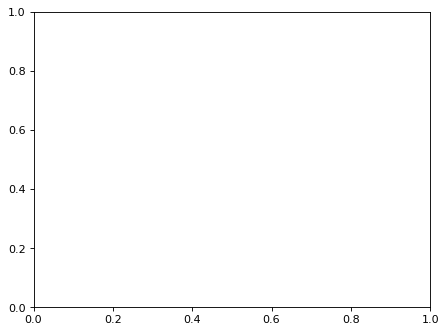

In [7]:
fig, ax = plt.subplots(dpi=80)

for experimentID in range(1, 6):
    statistics = pd.read_excel("./Results/statistics" + str(experimentID) + ".xlsx", index_col=0)

    realLabels = {0.0: 'S', 1.0: 'E', 2.1: 'Ia', 2.2: 'Is', 
                    2.3: 'Ic', 3: 'R', 4: 'D', 5: 'M'}

    #print(statistics)
    statistics['labels'] = statistics.index
    statistics['labels'] = statistics['labels'].apply(lambda x: realLabels[x])
    statistics = statistics.set_index('labels')
    statistics = statistics.T

    #print(statistics['labels'])
    for i in realLabels.values():
        if i not in statistics.keys():
            statistics[i] = None
    print(statistics)

    plotStatistics(statistics, ax)
    # fig.legend(loc='upper left')
    ax.set_xticks(statistics.index)
    ax.set_xlim(statistics.index[0], statistics.index[-1])
    ax.set_ylim(0, statistics.sum(axis=1)[0])
    
    ax.set_xlabel('Time', fontweight='bold')
    ax.set_ylabel('Individuals', fontweight='bold')
    ax.xaxis.set_major_formatter(myFmt)
    
    fig.legend(loc='upper center', fontsize='small', ncol=8, bbox_to_anchor=(0.53,1.1))
    
    fig.tight_layout()
    plt.xticks(rotation=65)

In [ ]:
fig, ax = plt.subplots(dpi=80)

statistics = pd.read_excel("./Results/statisticsq0.0.xlsx", index_col=0)

realLabels = {0.0: 'S', 1.0: 'E', 2.1: 'Ia', 2.2: 'Is', 
                2.3: 'Ic', 3: 'R', 4: 'D', 5: 'M'}

#print(statistics)
statistics['labels'] = statistics.index
statistics['labels'] = statistics['labels'].apply(lambda x: realLabels[x])
statistics = statistics.set_index('labels')
statistics = statistics.T

#print(statistics['labels'])
for i in realLabels.values():
    if i not in statistics.keys():
        statistics[i] = None
# print(statistics)

plotStatistics(statistics, ax)
# fig.legend(loc='upper left')
ax.set_xticks(statistics.index[::20])
ax.set_xlim(statistics.index[0], statistics.index[-1])
ax.set_ylim(0, statistics.sum(axis=1)[0])

ax.set_xlabel('Time', fontweight='bold')
ax.set_ylabel('Individuals', fontweight='bold')
ax.xaxis.set_major_formatter(myFmt)

fig.legend(loc='upper center', fontsize='small', ncol=8, bbox_to_anchor=(0.53,1.1))


fig.tight_layout()
plt.xticks(rotation=65)

FileNotFoundError: [Errno 2] No such file or directory: './Results/statisticsq0.0.xlsx'

In [ ]:
def loadData(fileName):
    statistics = pd.read_excel(fileName, index_col=0)

    # print(statistics)
    realLabels = {0.0: 'S', 1.0: 'E', 2.1: 'Ia', 2.2: 'Is', 
                    2.3: 'Ic', 3: 'R', 4: 'D', 5: 'M'}

    #print(statistics)
    statistics['labels'] = statistics.index
    statistics['labels'] = statistics['labels'].apply(lambda x: realLabels[x])
    statistics = statistics.set_index('labels')
    statistics = statistics.T

    #print(statistics['labels'])
    for i in realLabels.values():
        if i not in statistics.keys():
            statistics[i] = None

    return statistics

#statistics00 = loadData('./ResultsPLoS/statistics_e2_d100_i50_q0.0_qs15_qe60.xlsx')
#statistics04 = loadData('./ResultsPLoS/statistics_e2_d100_i50_q0.4_qs15_qe60.xlsx')
#statistics08 = loadData('./ResultsPLoS/statistics_e2_d100_i50_q0.8_qs15_qe60.xlsx')



#print(statistics00.tail())
#print(statistics04.tail())
#print(statistics08.tail())
#fig, ax = plt.subplots(1, 3, figsize=(24, 6), dpi=80)


#plotStatistics(statistics00, ax[0])
#plotStatistics(statistics04, ax[1])
#plotStatistics(statistics08, ax[2])

#fig.tight_layout()

NameError: name 'statistics00' is not defined

[18262.   18263.75 18265.75 18267.75 18269.75 18271.75 18273.75 18275.75
 18277.75 18279.75 18281.75 18283.75 18285.75 18287.75 18289.75 18291.75
 18293.75 18295.75 18297.75 18299.75 18301.75 18303.75 18305.75 18307.75
 18309.75 18311.75 18313.75 18315.75 18317.75 18319.75 18321.75 18323.75
 18325.75 18327.75 18329.75 18331.75 18333.75 18335.75 18337.75 18339.75
 18341.75 18343.75 18345.75 18347.75 18349.75 18351.75 18353.75 18355.75
 18357.75 18359.75 18361.75]


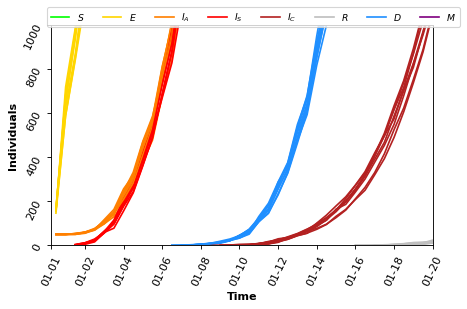

In [ ]:
fig, ax = plt.subplots(dpi=80)
for i in range (1, 9):
    statistics00 = loadData('./ResultsPLoS/statistics_e' + str(i) + '_d100_i50_q0.0_qs15_qe60.xlsx')
    # print(statistics00)
    custom_lines = plotStatistics(statistics00, ax)

ax.legend(custom_lines,
         [r'$S$', r'$E$', r'$I_A$', r'$I_S$', r'$I_C$', r'$R$', r'$D$', r'$M$'], loc='upper center', 
         fontsize='small', ncol=8, bbox_to_anchor=(0.53,1.1))

print(ax.get_xticks())
ax.set_xlim(ax.get_xlim()[0], ax.get_xticks()[-1])
ax.set_ylim(ax.get_ylim()[0], 1000)
fig.tight_layout()
